In [2]:
from numpy import array, arange, sin, pi, cos, sqrt, log, absolute, subtract, exp
from pylab import plot, show, legend, xlabel, ylabel, title
import vpython as vp

# Set up scene
scene = vp.canvas(background = vp.color.white, width=600, height=600)

c = 0.5
A = 1.2
freq = 2/3                          #frequency of external force

def f(r,t):
    theta = r[0]
    omega = r[1]
    F = A*sin(freq*t)
    ftheta = omega
    fomega = -g/l*sin(theta) - c*omega + F
    return array([ftheta, fomega], float)

#parameters
m = 1.0                          # mass of pendulum bob
g = 1.0                          # gravitational acceleration
l = 1.0                          # length of pendulum
theta10 = 0                       # initial angle
omega10 = 0                       # initial angular velocity
theta20 = 0.001                  # initial angle
omega20 = 0                       # initial angular velocity
r1 = array([theta10, omega10])      # initial conditions
r2 = array([theta20, omega20])      # initial conditions
t0 = 0                           # initial time
tf = 500                          # final time
N = 10000                         # number of points
h = (tf - t0)/N                  # step size
tpoints = arange(t0, tf, h)      # time values
thetalist1 = []                   # empty list for theta1
thetalist2 = []                   # empty list for theta2

# set up graphs
vp.graph(width=400, height=250, xtitle="Time", ytitle="Theta (radians)")
theta1Dots = vp.gdots(color=vp.color.red, label="Bob 1")
theta1Dots.plot(t0,theta10)

theta2Dots = vp.gdots(color=vp.color.green, label="Bob 2")
theta2Dots.plot(t0,theta20)

# Coordinate axes
axisRadius = 0.01
axisColor = vp.vector(0.5, 0.5, 0.5)

xaxis = vp.cylinder(pos=vp.vector(-5,0,0), axis=vp.vector(10,0,0), radius = axisRadius, color=axisColor)
yaxis = vp.cylinder(pos=vp.vector(0,-5,0), axis=vp.vector(0,10,0), radius = axisRadius, color=axisColor)
zaxis = vp.cylinder(pos=vp.vector(0,0,-5), axis=vp.vector(0,0,10), radius = axisRadius, color=axisColor)
vp.label(pos=xaxis.pos + xaxis.axis, text='x', height=10, box=False)
vp.label(pos=yaxis.pos + yaxis.axis, text='y', height=10, box=False)
vp.label(pos=zaxis.pos + zaxis.axis, text='z', height=10, box=False)

# Box
pivot = vp.vector(0,0,0)
bob1 = vp.sphere(pos=vp.vector(l * cos(theta10 - pi/2),l * sin(theta10 - pi/2),0), size=vp.vector(.5,.5,.5), color=vp.color.red, make_trail=False)
rod1 = vp.cylinder(pos=pivot, axis=bob1.pos-pivot, radius=0.05, color=vp.color.blue)

bob2 = vp.sphere(pos=vp.vector(l * cos(theta20 - pi/2),l * sin(theta20 - pi/2),0), size=vp.vector(.5,.5,.5), color=vp.color.green, make_trail=False)
rod2 = vp.cylinder(pos=pivot, axis=bob2.pos-pivot, radius=0.05, color=vp.color.blue)

for t in tpoints:
    vp.rate(20)
    theta1Dots.plot(t,r1[0])
    thetalist1.append(r1[0])
    
    theta2Dots.plot(t,r2[0])
    thetalist2.append(r2[0])
    
    #4th order Runge Kutta
    k1 = h*f(r1, t)
    k2 = h*f(r1 + 0.5*k1, t + 0.5*h)
    k3 = h*f(r1 + 0.5*k2, t + 0.5*h)
    k4 = h*f(r1 + k3, t + h)
    r1 = r1 + 1/6*(k1 + 2*k2 + 2*k3 + k4)
    
    k1 = h*f(r2, t)
    k2 = h*f(r2 + 0.5*k1, t + 0.5*h)
    k3 = h*f(r2 + 0.5*k2, t + 0.5*h)
    k4 = h*f(r2 + k3, t + h)
    r2 = r2 + 1/6*(k1 + 2*k2 + 2*k3 + k4)
    
    bob1.pos = vp.vector(l * cos(r1[0] - pi/2),l * sin(r1[0] - pi/2),0)
    rod1.axis = bob1.pos-pivot
    
    bob2.pos = vp.vector(l * cos(r2[0] - pi/2),l * sin(r2[0] - pi/2),0)
    rod2.axis = bob2.pos-pivot
    

<IPython.core.display.Javascript object>

KeyboardInterrupt: 

Text(0, 0.5, '$ln_{|\\theta_2 - \\theta_1|}$')

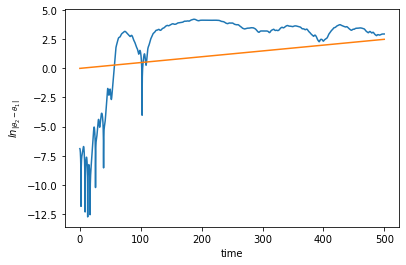

In [56]:
lam = 0.005
plot(tpoints, log(absolute(subtract(thetalist2, thetalist1))))
plot(tpoints, lam*tpoints)
xlabel("time")
ylabel(r"$ln_{|\theta_2 - \theta_1|}$")

I am not sure if I did this right but $\lambda$ is about equal to $0.005$